<a href="https://colab.research.google.com/github/mobfigr/generative-ai-for-beginners/blob/main/Low_Code_NLP_RAG_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

The healthcare industry is rapidly evolving, with professionals facing increasing challenges in managing vast volumes of medical data while delivering accurate and timely diagnoses. The need for quick access to comprehensive, reliable, and up-to-date medical knowledge is critical for improving patient outcomes and ensuring informed decision-making in a fast-paced environment.

Healthcare professionals often encounter information overload, struggling to sift through extensive research and data to create accurate diagnoses and treatment plans. This challenge is amplified by the need for efficiency, particularly in emergencies, where time-sensitive decisions are vital. Furthermore, access to trusted, current medical information from renowned manuals and research papers is essential for maintaining high standards of care.

To address these challenges, healthcare centers can focus on integrating systems that streamline access to medical knowledge, provide tools to support quick decision-making, and enhance efficiency. Leveraging centralized knowledge platforms and ensuring healthcare providers have continuous access to reliable resources can significantly improve patient care and operational effectiveness.

**Common Questions to Answer**

**1. Diagnostic Assistance**: "What are the common symptoms and treatments for pulmonary embolism?"

**2. Drug Information**: "Can you provide the trade names of medications used for treating hypertension?"

**3. Treatment Plans**: "What are the first-line options and alternatives for managing rheumatoid arthritis?"

**4. Specialty Knowledge**: "What are the diagnostic steps for suspected endocrine disorders?"

**5. Critical Care Protocols**: "What is the protocol for managing sepsis in a critical care unit?"

### Objective

As an AI specialist, your task is to develop a RAG-based AI solution using renowned medical manuals to address healthcare challenges. The objective is to **understand** issues like information overload, **apply** AI techniques to streamline decision-making, **analyze** its impact on diagnostics and patient outcomes, **evaluate** its potential to standardize care practices, and **create** a functional prototype demonstrating its feasibility and effectiveness.

### Data Description

The **Merck Manuals** are medical references published by the American pharmaceutical company Merck & Co., that cover a wide range of medical topics, including disorders, tests, diagnoses, and drugs. The manuals have been published since 1899, when Merck & Co. was still a subsidiary of the German company Merck.

The manual is provided as a PDF with over 4,000 pages divided into 23 sections.

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_____' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_____' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

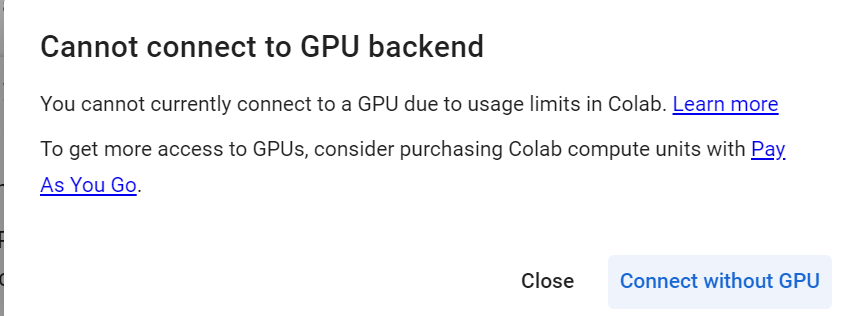

## Installing and Importing Necessary Libraries and Dependencies

In [1]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
# !CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 66.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 143.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 147.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 195.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 142.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine

In [1]:
# For installing the libraries & downloading models from HF Hub
!pip install huggingface_hub==0.23.2 pandas==1.5.3 tiktoken==0.6.0 pymupdf==1.25.1 langchain==0.1.1 langchain-community==0.0.13 chromadb==0.4.22 sentence-transformers==2.3.1 numpy==1.25.2 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.7/401.7 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 116.9 M

In [1]:
#Libraries for downloading and loading the llm
from huggingface_hub import hf_hub_download
from llama_cpp import Llama

## Question Answering using LLM

### Downloading and Loading the model

In [2]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [4]:
model_path = hf_hub_download(
    repo_id= model_name_or_path, #Complete the code to mention the repo id
    filename= model_basename #Complete the code to mention the model name
)

In [5]:
#uncomment the below snippet of code if the runtime is connected to GPU.
llm = Llama(
    model_path=model_path,
    n_ctx=2300,
    n_gpu_layers=38,
    n_batch=512
)

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


In [ ]:
#uncomment the below snippet of code if the runtime is connected to CPU only.
#llm = Llama(
#    model_path=model_path,
#    n_ctx=1024,
#    n_cores=-2
#)

### Response

In [6]:
def response(query,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    model_output = llm(
      prompt=query,
      max_tokens=max_tokens,
      temperature=temperature,
      top_p=top_p,
      top_k=top_k
    )

    return model_output['choices'][0]['text']

In [7]:
response("What treatment options are available for managing hypertension?")

'\n\nHypertension, or high blood pressure, is a common condition that can increase the risk of various health problems such as heart disease, stroke, and kidney damage. The good news is that there are several effective treatment options available to help manage hypertension and reduce the risk of complications. Here are some of the most commonly used treatments:\n\n1. Lifestyle modifications: Making lifestyle changes is often the first line of defense against hypertension. This may include eating a healthy diet rich in fruits, vegetables, whole grains, and lean proteins; limiting sodium intake; getting regular physical activity'

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [8]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
response(user_input)

Llama.generate: prefix-match hit


'\n\nSepsis is a life-threatening condition that can arise from an infection, and it requires prompt recognition and aggressive management in a critical care unit. The following are general steps for managing sepsis in a critical care unit:\n\n1. Early recognition: Recognize the signs and symptoms of sepsis early and initiate treatment as soon as possible. Sepsis can present with various clinical features, including fever or hypothermia, tachycardia or bradycardia, altered mental status, respiratory distress, and lactic acidosis.\n2. Resusc'

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [10]:
user_input_2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #Complete the code to define the query #2
response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\n\nAppendicitis is a medical condition characterized by inflammation of the appendix, a small tube-shaped organ located in the lower right side of the abdomen. The symptoms of appendicitis can vary from person to person, but some common signs include:\n\n1. Abdominal pain: The pain is typically located in the lower right quadrant of the abdomen and may start as a mild discomfort that gradually worsens over time. The pain may be constant or intermittent and may be aggravated by movement, deep breathing, or coughing.\n2. Loss of appetite'

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [11]:
user_input_2 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #Complete the code to define the query #3
response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\n\nSudden patchy hair loss, also known as alopecia areata, is a common autoimmune disorder that affects the hair follicles. It can result in round or oval bald patches on the scalp, but it can also occur on other parts of the body such as the beard area, eyebrows, or eyelashes.\n\nThe exact cause of alopecia areata is not known, but it's believed to be related to a problem with the immune system. Some possible triggers for this condition include stress, genetics, viral infections, and certain medications."

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [12]:
user_input_2 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to define the query #4
response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\n\nA person who has sustained a physical injury to brain tissue, also known as a traumatic brain injury (TBI), may require various treatments depending on the severity and location of the injury. Here are some common treatments recommended for TBIs:\n\n1. Emergency care: The first priority is to ensure the person's airway is clear, they are breathing, and their heart is beating normally. In severe cases, emergency surgery may be required to remove hematomas or other obstructions.\n2. Medications: Depending on the symptoms, medications may be prescribed to manage conditions such as"

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [13]:
user_input_2 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #Complete the code to define the query #5
response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\n\nFirst and foremost, if you suspect that someone has fractured their leg while hiking, it's essential to ensure their safety and prevent further injury. Here are some necessary precautions:\n\n1. Keep the person calm and still: Encourage them to remain as still as possible to minimize pain and prevent worsening the injury.\n2. Assess the situation: Check for any signs of shock, such as pale skin, rapid heartbeat, or shallow breathing. If you notice these symptoms, seek medical help immediately.\n3. Immobilize the leg: Use a splint, sl"

## Question Answering using LLM with Prompt Engineering

In [17]:
system_prompt = "You are an AI agent analyzing Merck medical manuals to address healthcare challenges. The objective is to understand issues like information overload, apply AI techniques to streamline decision-making, analyze its impact on diagnostics and patient outcomes, evaluate its potential to standardize care practices, and create a functional prototype demonstrating its feasibility and effectiveness." #Complete the code to define the system prompt

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [18]:
user_input = system_prompt+"\n"+ "What is the protocol for managing sepsis in a critical care unit?"
response(user_input)

Llama.generate: prefix-match hit


'\nSepsis is a life-threatening condition that can arise from an infection, and it requires prompt recognition and intervention in a critical care unit. The protocol for managing sepsis in a critical care unit typically involves the following steps:\n1. Early recognition: Identify patients who may be at risk of developing sepsis based on clinical signs and laboratory results. This includes monitoring vital signs, assessing mental status, and looking for signs of infection.\n2. Rapid response: Once sepsis is suspected, initiate resuscitation measures to maintain adequate organ perfusion. This includes administering fluids'

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [19]:
user_input = system_prompt +"\n" + "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #Complete the code to pass the query #2
response(user_input) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\nAccording to Merck Manual, the common symptoms of appendicitis include:\n1. Sudden onset of pain in the lower right abdomen, often starting around the navel and then shifting to the right side.\n2. Loss of appetite and feeling sick to your stomach (nausea).\n3. Vomiting.\n4. Fever, which may be low-grade at first but can rise to very high temperatures as the condition worsens.\n5. Abdominal swelling and rigidity.\n6. Diarrhea or constipation.\n7.'

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [20]:
user_input = system_prompt +"\n" + "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #Complete the code to pass the query #3
response(user_input) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\nAccording to Merck Manual, there are several potential causes of sudden, patchy hair loss, also known as alopecia areata. Some common causes include:\n1. Autoimmune disorder: Alopecia areata is an autoimmune disease that occurs when the body's immune system attacks the hair follicles, leading to hair loss.\n2. Stress: Emotional or physical stress can trigger alopecia areata or worsen existing cases.\n3. Genetics: There is a genetic predisposition to developing alopecia areata.\n"

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [21]:
user_input = system_prompt +"\n" + "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to pass the query #4
response(user_input) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\nAccording to Merck Manual Professional Version, the treatment for a person with a brain injury depends on the severity and location of the injury. Here are some common treatments:\n1. Supportive care: This includes managing airway, breathing, and circulation, controlling seizures, preventing infection, and providing adequate nutrition and hydration.\n2. Medications: Depending on the symptoms, medications may be prescribed to manage pain, reduce inflammation, prevent or treat seizures, improve cognitive function, and address behavioral changes.\n3. Rehabilitation: This includes physical therapy, occupational therapy'

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [22]:
user_input = system_prompt +"\n" + "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #Complete the code to pass the query #5
response(user_input) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\nAccording to Merck Manual Professional Version, a fracture is defined as a break in a bone. A fractured leg can occur due to various reasons such as falls, motor vehicle accidents, or sports injuries. The treatment and precautions depend on the severity of the fracture. Here are some general steps for managing a fractured leg:\n1. Assessing the Severity: The first step is to assess the severity of the fracture based on symptoms such as pain, swelling, deformity, and inability to bear weight. Severe fractures may require immediate medical attention, while'

## Data Preparation for RAG

In [23]:
#Libraries for processing dataframes,text
import json,os
import tiktoken
import pandas as pd

#Libraries for Loading Data, Chunking, Embedding, and Vector Databases
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain_community.vectorstores import Chroma

### Loading the Data

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
manual_pdf_path = "/content/drive/My Drive/Colab Notebooks/medical_diagnosis_manual.pdf" #Complete the code to define the file name

In [30]:
pdf_loader = PyMuPDFLoader(manual_pdf_path)

In [31]:
manual = pdf_loader.load()

### Data Overview

#### Checking the first 5 pages

In [32]:
for i in range(5):
    print(f"Page Number : {i+1}",end="\n")
    print(manual[i].page_content,end="\n")

Page Number : 1
kaiser.malek@gmail.com
FWVM2UAG8O
ant for personal use by kaiser.malek@g
shing the contents in part or full is liable 

Page Number : 2
kaiser.malek@gmail.com
FWVM2UAG8O
This file is meant for personal use by kaiser.malek@gmail.com only.
Sharing or publishing the contents in part or full is liable for legal action.

Page Number : 3
Table of Contents
1
Front    ................................................................................................................................................................................................................
1
Cover    .......................................................................................................................................................................................................
2
Front Matter    .......................................................................................................................................................................................

#### Checking the number of pages

In [34]:
len(manual)

4114

### Data Chunking

In [35]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    encoding_name='cl100k_base',
    chunk_size=512, #Complete the code to define the chunk size
    chunk_overlap= 20 #Complete the code to define the chunk overlap
)

In [36]:
document_chunks = pdf_loader.load_and_split(text_splitter)

In [37]:
len(document_chunks)

8477

In [38]:
document_chunks[0].page_content

'kaiser.malek@gmail.com\nFWVM2UAG8O\nant for personal use by kaiser.malek@g\nshing the contents in part or full is liable'

In [39]:
document_chunks[2].page_content

'Table of Contents\n1\nFront    ................................................................................................................................................................................................................\n1\nCover    .......................................................................................................................................................................................................\n2\nFront Matter    ...........................................................................................................................................................................................\n53\n1 - Nutritional Disorders    ...............................................................................................................................................................\n53\nChapter 1. Nutrition: General Considerations    ...........................................................................................

In [40]:
document_chunks[3].page_content

"Chapter 24. Testing for Hepatic & Biliary Disorders    ......................................................................................................\n305\nChapter 25. Drugs & the Liver    ................................................................................................................................................\n308\nChapter 26. Alcoholic Liver Disease    ....................................................................................................................................\n314\nChapter 27. Fibrosis & Cirrhosis    ............................................................................................................................................\n322\nChapter 28. Hepatitis    ..................................................................................................................................................................\n333\nChapter 29. Vascular Disorders of the Liver    .................................................

As expected, there are some overlaps

### Embedding

In [41]:
embedding_model = SentenceTransformerEmbeddings(model_name="thenlper/gte-large") #Complete the code to define the model name

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/67.9k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [42]:
embedding_1 = embedding_model.embed_query(document_chunks[0].page_content)
embedding_2 = embedding_model.embed_query(document_chunks[1].page_content)

In [43]:
print("Dimension of the embedding vector ",len(embedding_1))
len(embedding_1)==len(embedding_2)

Dimension of the embedding vector  1024


True

In [44]:
embedding_1,embedding_2

([-0.014770405367016792,
  -0.00017232449317816645,
  0.001943119103088975,
  0.01592710055410862,
  -0.013167357072234154,
  -0.019841287285089493,
  -0.02380417101085186,
  0.04262435808777809,
  0.01117655448615551,
  0.01556305680423975,
  0.04457955062389374,
  -0.002800457179546356,
  0.009023544378578663,
  -0.03572705015540123,
  -0.018510127440094948,
  -0.0009744357084855437,
  -0.014202763326466084,
  -0.027505679056048393,
  -0.0015468124765902758,
  0.002849873621016741,
  0.01694943942129612,
  0.005533588118851185,
  -0.09919825941324234,
  -0.01940576359629631,
  -0.012036243453621864,
  0.013332247734069824,
  0.02138613909482956,
  -0.008462859317660332,
  0.052523039281368256,
  0.044473543763160706,
  -0.012335364706814289,
  -0.010188612155616283,
  0.03851873800158501,
  -0.047427237033843994,
  -0.011843584477901459,
  -0.011400491930544376,
  0.07133524119853973,
  -0.03258153423666954,
  -0.02835032343864441,
  -0.047715406864881516,
  0.017661340534687042,
  -

### Vector Database

In [45]:
out_dir = 'medical_db'

if not os.path.exists(out_dir):
  os.makedirs(out_dir)

In [46]:
vectorstore = Chroma.from_documents(
    document_chunks, #Complete the code to pass the document chunks
    embedding_model, #Complete the code to pass the embedding model
    persist_directory=out_dir
)

In [47]:
vectorstore = Chroma(persist_directory=out_dir,embedding_function=embedding_model)

In [48]:
vectorstore.embeddings

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 1024, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False})
  (2): Normalize()
), model_name='thenlper/gte-large', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False)

In [49]:
vectorstore.similarity_search("hypertension",k=3) #Complete the code to pass a query and an appropriate k value

[Document(page_content='Chapter 208. Arterial Hypertension\nIntroduction\nHypertension is sustained elevation of resting systolic BP (≥ 140 mm Hg), diastolic BP (≥ 90 mm\nHg), or both. Hypertension with no known cause (primary; formerly, essential hypertension) is\nmost common. Hypertension with an identified cause (secondary hypertension) is usually due\nto a renal disorder. Usually, no symptoms develop unless hypertension is severe or long-\nstanding. Diagnosis is by sphygmomanometry. Tests may be done to determine cause, assess\ndamage, and identify other cardiovascular risk factors. Treatment involves lifestyle changes and\ndrugs, including diuretics, β-blockers, ACE inhibitors, angiotensin II receptor blockers, and Ca\nchannel blockers.\nIn the US, about 65 million people have hypertension. Only about 70% of these people are aware that\nthey have hypertension, only 59% are being treated, and only 34% have adequately controlled BP. In\nadults, hypertension occurs more often in blac

### Retriever

In [50]:
retriever = vectorstore.as_retriever(
    search_type='similarity',
    search_kwargs={'k': 2} #Complete the code to pass an appropriate k value
)

In [51]:
rel_docs = retriever.get_relevant_documents("What are the common symptoms and treatments for pulmonary embolism?") #Complete the code to pass the query
rel_docs

[Document(page_content='Chapter 194. Pulmonary Embolism\nIntroduction\nPulmonary embolism (PE) is the occlusion of ≥ 1 pulmonary arteries by thrombi that originate\nelsewhere, typically in the large veins of the lower extremities or pelvis. Risk factors are\nconditions that impair venous return, conditions that cause endothelial injury or dysfunction,\nand underlying hypercoagulable states. Symptoms are nonspecific and include dyspnea,\npleuritic chest pain, cough, and, in severe cases, syncope or cardiorespiratory arrest. Signs are\nalso nonspecific and may include tachypnea, tachycardia, hypotension, and a loud pulmonic\ncomponent of the 2nd heart sound. Diagnosis is based on a CT angiogram, ventilation/perfusion\nscan, or a pulmonary arteriogram. Treatment is with anticoagulants and, sometimes, clot\ndissolution with thrombolytics or surgical removal. Preventive measures include anticoagulants\nand sometimes insertion of an inferior vena caval filter.\nPE affects an estimated 117 pe

In [52]:
model_output = llm(
      "What is the source of pulmonary embolism", #Complete the code to pass the query
      max_tokens=350, #Complete the code to pass the maximum number of tokens
      temperature=0.1, #Complete the code to pass the temperature
    )

Llama.generate: prefix-match hit


In [53]:
model_output['choices'][0]['text']

'?\n\nPulmonary embolism (PE) is a serious condition that occurs when a blood clot or other foreign substance travels to the lungs and blocks one or more of the arteries in the lungs. The most common cause of PE is a blood clot that forms in the deep veins of the legs, known as deep vein thrombosis (DVT). Other causes include:\n\n* Blood clots that form in other parts of the body, such as the pelvis or upper extremities\n* Fat or air bubbles that enter the bloodstream and travel to the lungs\n* Tumors or other substances that break off and travel to the lungs\n* Bacteria or other infectious agents that enter the bloodstream and cause inflammation in the lungs\n\nSymptoms of PE can include shortness of breath, chest pain, rapid heart rate, and coughing up blood. If you suspect that you have PE, it is important to seek medical attention right away as it can be a life-threatening condition. Your healthcare provider may perform tests such as an electrocardiogram (ECG), chest X-ray, or ultr

The above response is somewhat generic and is solely based on the data the model was trained on, rather than the medical manual.  

Let's now provide our own context.

### System and User Prompt Template

Prompts guide the model to generate accurate responses. Here, we define two parts:

    1. The system message describing the assistant's role.
    2. A user message template including context and the question.

In [54]:
qna_system_message = """
You are an assistant whose work is to review the medical manuals and provide the appropriate answers from the context.
User input will have the context required by you to answer user questions.
This context will begin with the token: ###Context.
The context contains references to specific portions of a document relevant to the user query.

User questions will begin with the token: ###Question.

Please answer only using the context provided in the input. Do not mention anything about the context in your final answer.

If the answer is not found in the context, respond "I don't know".
"""  #Complete the code to define the system message

In [55]:
qna_user_message_template = """
###Context
Here are some documents that are relevant to the question mentioned below.
{context}

###Question
{question}
""" #Complete the code to define the user message

### Response Function

In [56]:
def generate_rag_response(user_input,k=3,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=k)
    context_list = [d.page_content for d in relevant_document_chunks]

    # Combine document chunks into a single context
    context_for_query = ". ".join(context_list)

    user_message = qna_user_message_template.replace('{context}', context_for_query)
    user_message = user_message.replace('{question}', user_input)

    prompt = qna_system_message + '\n' + user_message

    # Generate the response
    try:
        response = llm(
                  prompt=prompt,
                  max_tokens=max_tokens,
                  temperature=temperature,
                  top_p=top_p,
                  top_k=top_k
                  )

        # Extract and print the model's response
        response = response['choices'][0]['text'].strip()
    except Exception as e:
        response = f'Sorry, I encountered the following error: \n {e}'

    return response

## Question Answering using RAG

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [57]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
generate_rag_response(user_input,top_k=20)

Llama.generate: prefix-match hit


'Based on the context provided, the protocol for managing sepsis in a critical care unit includes:\n1. Administering parenteral antibiotics after taking specimens for Gram stain and culture.\n2. Starting very prompt empiric therapy as soon as sepsis is suspected.\n3. Selecting an antibiotic regimen based on the suspected source, clinical setting, knowledge or suspicion of causative organisms and sensitivity patterns common to that specific inpatient unit, and previous culture results.\n4. Adding vancomycin if resistant staphylococci or enter'

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [58]:
user_input_2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #Complete the code to pass the query #2
generate_rag_response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'Based on the context provided, the answer would be: Appendicitis is characterized by abdominal pain, anorexia, and abdominal tenderness. It cannot be cured via medicine alone; surgery (appendectomy) is required for treatment.'

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [59]:
user_input_2 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #Complete the code to pass the query #3
generate_rag_response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'Based on the context provided, the condition being described is Alopecia Areata. The effective treatments for this condition include topical, intralesional, or systemic corticosteroids, topical minoxidil, topical anthralin, topical immunotherapy (diphencyprone or squaric acid dibutylester), or psoralen plus ultraviolet A (PUVA). The possible cause behind this condition is an autoimmune disorder.'

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [60]:
user_input_2 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to pass the query #4
generate_rag_response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'I. Supportive care including preventing systemic complications due to immobilization, providing good nutrition, and preventing pressure ulcers is recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function. There is no specific treatment for the injury itself.'

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [61]:
user_input_2 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #Complete the code to pass the query #5
generate_rag_response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'Based on the context provided, here is the answer:\n\nThe person with a fractured leg should elevate the injured limb above heart level for the first 2 days to minimize swelling. After 48 hours, they can apply heat for 15 to 20 minutes to relieve pain and speed healing. Immobilization is necessary to prevent further injury and facilitate healing. Joints proximal and distal to the injury should be immobilized using a cast or splint. A cast should be kept dry, and patients should inspect its edges and skin around it daily for redness or'

### Fine-tuning

#### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [62]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
generate_rag_response(user_input,temperature=0.5)

Llama.generate: prefix-match hit


"I don't know without additional context, but based on the provided context, the protocol for managing sepsis in a critical care unit includes giving parenteral antibiotics after specimens have been taken for Gram stain and culture, starting very prompt empiric therapy immediately if sepsis is suspected, using regimens such as gentamicin or tobramycin with a 3rd-generation cephalosporin or ceftazidime plus a fluoroquinolone, adding vancomycin if resistant staphylococci or enterococci are suspected"

#### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [63]:
user_input_2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #Complete the code to pass the query #2
generate_rag_response(user_input_2,temperature=0.5) #Complete the code to pass the user input along with the parameters

Llama.generate: prefix-match hit


'###Answer\nThe common symptoms for appendicitis include abdominal pain, anorexia, and abdominal tenderness. Appendicitis cannot be cured via medicine alone, but surgery in the form of open or laparoscopic appendectomy is the recommended treatment.'

#### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [64]:
user_input_2 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #Complete the code to pass the query #3
generate_rag_response(user_input_2,temperature=0.5) #Complete the code to pass the user input along with the parameters

Llama.generate: prefix-match hit


'Based on the context provided, the condition being described is alopecia areata. The effective treatments for this condition include topical, intralesional, or systemic corticosteroids, topical minoxidil, topical anthralin, topical immunotherapy (diphencyprone or squaric acid dibutylester), or psoralen plus ultraviolet A (PUVA). The possible cause behind sudden patchy hair loss in alopecia areata is an autoimmune disorder affecting genetically susceptible people exposed to unclear environmental triggers.'

#### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [65]:
user_input_2 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to pass the query #4
generate_rag_response(user_input_2,temperature=0.5) #Complete the code to pass the user input along with the parameters

Llama.generate: prefix-match hit


'I recommend the following treatments based on the context:\n1. Ensuring a reliable airway and maintaining adequate ventilation, oxygenation, and blood pressure.\n2. Surgery if there is more severe injury to place monitors to track and treat intracranial pressure, decompress the brain if intracranial pressure is increased, or remove intracranial hematomas.\n3. Maintaining adequate brain perfusion and oxygenation and preventing complications of altered sensorium in the first few days after the injury.\n4. Rehabilitation for many patients subsequently.\n5. Prevent'

#### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [66]:
user_input_2 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #Complete the code to pass the query #5
generate_rag_response(user_input_2,temperature=0.5) #Complete the code to pass the user input along with the parameters

Llama.generate: prefix-match hit


'To answer this question, I would refer to the context provided which discusses the treatment for fractures. According to the context, the initial steps for treating a fractured leg include applying elastic bandages (batting, and layers 2 and 4) to the injured limb, elevating it above the heart to minimize swelling, and immobilizing the joints proximal and distal to the injury. After 48 hours, periodic application of warmth may relieve pain and speed healing. A cast is used for fractures or other injuries that require weeks of immobilization, but if severe sw'

## Output Evaluation

Let us now use the LLM-as-a-judge method to check the quality of the RAG system on two parameters - retrieval and generation.

- We are using the same Mistral model for evaluation, so basically here the llm is rating itself on how well he has performed in the task.

In [67]:
groundedness_rater_system_message = """
You are tasked with rating AI generated answers to questions posed by users.
You will be presented a question, context used by the AI system to generate the answer and an AI generated answer to the question.
In the input, the question will begin with ###Question, the context will begin with ###Context while the AI generated answer will begin with ###Answer.

Evaluation criteria:
The task is to judge the extent to which the metric is followed by the answer.
1 - The metric is not followed at all
2 - The metric is followed only to a limited extent
3 - The metric is followed to a good extent
4 - The metric is followed mostly
5 - The metric is followed completely

Metric:
The answer should be derived only from the information presented in the context

Instructions:
1. First write down the steps that are needed to evaluate the answer as per the metric.
2. Give a step-by-step explanation if the answer adheres to the metric considering the question and context as the input.
3. Next, evaluate the extent to which the metric is followed.
4. Use the previous information to rate the answer using the evaluaton criteria and assign a score.
""" #Complete the code to define the prompt to evaluate groundedness

In [68]:
relevance_rater_system_message = """
You are tasked with rating AI generated answers to questions posed by users.
You will be presented a question, context used by the AI system to generate the answer and an AI generated answer to the question.
In the input, the question will begin with ###Question, the context will begin with ###Context while the AI generated answer will begin with ###Answer.

Evaluation criteria:
The task is to judge the extent to which the metric is followed by the answer.
1 - The metric is not followed at all
2 - The metric is followed only to a limited extent
3 - The metric is followed to a good extent
4 - The metric is followed mostly
5 - The metric is followed completely

Metric:
Relevance measures how well the answer addresses the main aspects of the question, based on the context.
Consider whether all and only the important aspects are contained in the answer when evaluating relevance.

Instructions:
1. First write down the steps that are needed to evaluate the context as per the metric.
2. Give a step-by-step explanation if the context adheres to the metric considering the question as the input.
3. Next, evaluate the extent to which the metric is followed.
4. Use the previous information to rate the context using the evaluaton criteria and assign a score.
""" #Complete the code to define the prompt to evaluate relevance

In [70]:
user_message_template = """
###Question
{question}

###Context
{context}

###Answer
{answer}
"""

In [69]:
def generate_ground_relevance_response(user_input,k=3,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=3)
    context_list = [d.page_content for d in relevant_document_chunks]
    context_for_query = ". ".join(context_list)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"""[INST]{qna_system_message}\n
                {'user'}: {qna_user_message_template.format(context=context_for_query, question=user_input)}
                [/INST]"""

    response = llm(
            prompt=prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    answer =  response["choices"][0]["text"]

    # Combine user_prompt and system_message to create the prompt
    groundedness_prompt = f"""[INST]{groundedness_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    # Combine user_prompt and system_message to create the prompt
    relevance_prompt = f"""[INST]{relevance_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    response_1 = llm(
            prompt=groundedness_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    response_2 = llm(
            prompt=relevance_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    return response_1['choices'][0]['text'],response_2['choices'][0]['text']

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [71]:
ground,rel = generate_ground_relevance_response(user_input="What is the protocol for managing sepsis in a critical care unit?",max_tokens=370)

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Steps to evaluate the answer:
1. Identify the key information related to managing sepsis in a critical care unit from the context.
2. Compare the identified information with the AI generated answer to check if the answer is derived only from the context.
3. Evaluate the extent to which the metric is followed.

Explanation:
The context provides detailed information about managing critically ill patients in an ICU, including supportive care and patient monitoring. Among these details, there are specific instructions for managing sepsis, such as administering antibiotics, draining abscesses, and normalizing blood glucose. The AI generated answer summarizes these instructions accurately, making it clear that the answer is derived only from the context.

Evaluation:
The metric is followed completely.

Rating:
Based on the evaluation criteria, I would rate the answer as a 5 because the metric is followed completely.

 Steps to evaluate the context as per the relevance metric:
1. Identify th

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [73]:
ground,rel = generate_ground_relevance_response(user_input="What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?",max_tokens=370) #Complete the code to pass the query #2 along with parameters if needed
print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Steps to evaluate the answer:
1. Identify the key information in the context related to appendicitis and its treatment.
2. Determine if the symptoms mentioned in the question are present in the context.
3. Check if the answer mentions only the symptoms and treatment options derived from the context.
4. Verify that the answer does not include any additional or incorrect information.

Explanation:
The answer adheres to the metric as it mentions the common symptoms for appendicitis (abdominal pain, anorexia, and abdominal tenderness) and states that it cannot be cured via medicine alone but requires surgical removal of the appendix. Both of these pieces of information are directly derived from the context.

Evaluation:
The metric is followed completely.

Rating:
Based on the evaluation criteria, the answer would receive a score of 5 for following the metric completely.

 Steps to evaluate the context as per the relevance metric:
1. Identify the main aspects of the question: common sympto

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [74]:
ground,rel = generate_ground_relevance_response(user_input="What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?",max_tokens=370) #Complete the code to pass the query #3 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Steps to evaluate the answer:
1. Identify the main question and the specific information being asked for in the question.
2. Read through the context provided to understand the key points related to the topic of sudden patchy hair loss, including possible causes and effective treatments.
3. Determine if the AI generated answer is derived only from the information presented in the context.

Explanation:
The AI generated answer adheres to the metric as it mentions the specific treatments for addressing sudden patchy hair loss (alopecia areata) that were discussed in the context, including topical, intralesional, or systemic corticosteroids, topical minoxidil, topical anthralin, topical immunotherapy (diphencyprone or squaric acid dibutylester), and psoralen plus ultraviolet A (PUVA). The possible causes mentioned in the answer are also consistent with what was stated in the context as an autoimmune disorder affecting genetically susceptible people exposed to unclear environmental trigge

### Query 4: What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [75]:
ground,rel = generate_ground_relevance_response(user_input="What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?",max_tokens=370) #Complete the code to pass the query #4 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Steps to evaluate the answer:
1. Identify the key information in the context related to treatments for TBI.
2. Determine if the AI generated answer is derived solely from the information presented in the context.

Explanation:
The AI generated answer correctly identifies that there is no specific treatment for TBI mentioned in the context, but supportive care should be provided. The answer also lists out the components of supportive care as mentioned in the context. Therefore, the answer is derived solely from the information presented in the context and adheres to the metric.

Evaluation:
The metric is followed completely.

Rating:
Based on the evaluation criteria, I would rate the answer a 5. The metric was followed completely as the answer was derived only from the information presented in the context.

 Steps to evaluate the context as per the relevance metric:
1. Identify the main aspects of the question: The question asks about treatments for a person with brain injury.
2. Deter

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [76]:
ground,rel = generate_ground_relevance_response(user_input="What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?",max_tokens=370) #Complete the code to pass the query #5 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Steps to evaluate the answer:
1. Identify the information in the context related to precautions and treatment for a person with a fractured leg.
2. Compare each element of the answer with the corresponding information in the context.
3. Determine if the answer is derived solely from the context.

Explanation:
The answer adheres to the metric as it includes all necessary precautions and treatment steps for a person with a fractured leg, which are directly derived from the context. The context provides information on elevating the injured limb, applying warmth, immobilizing joints, keeping the cast dry, inspecting the cast, seeking medical care, maintaining good hygiene, and using a splint instead of a cast for shorter periods of immobilization. The answer covers all these points, making it clear that the information is derived solely from the context.

Evaluation:
The metric is followed completely.

Rating:
Based on the evaluation criteria, I would rate this answer as a 5 (The metric i

## Actionable Insights and Business Recommendations

- Vector database creation time increases with the number of pages in the PDF document.
- Retrieval parameter **`k`** is critical as the answer can be spread across multiple contexts.
- **`chunk_overlap`** ensures coherence, especially when context spans across chunks.
- **`max_tokens`** depends on query complexity; higher values yield detailed responses, while simple queries result in concise outputs despite large token limits due to prompt design and zero **`temperature`**.
- Refine prompt design and temperature settings to control response length and creativity.
- Continuously adjust RAG parameters based on specific use cases for optimal performance.
- Prioritize groundedness and relevance in evaluations to ensure reliable and contextually accurate outputs.
- Establish a feedback loop to fine-tune parameters, improving performance for diverse query types.

<font size=6 color='blue'>Power Ahead</font>
___